# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [74]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [75]:
from tensorflow.keras.utils import to_categorical

# Inspect the shapes of the datasets
print(f'The shape of the dataset observations is train: {X_train.shape} test: {X_test.shape}')
print(f'The shape of the dataset categorical variable is : {y_train.shape} test: {y_test.shape}')
print(f'by definition, we have {len(class_names)} classes')

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes= len(class_names))
y_test = to_categorical(y_test, num_classes=len(class_names))
print(f'after encoding {y_train[0]}')

The shape of the dataset observations is train: (60000, 28, 28) test: (10000, 28, 28)
The shape of the dataset categorical variable is : (60000,) test: (10000,)
by definition, we have 10 classes
after encoding [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


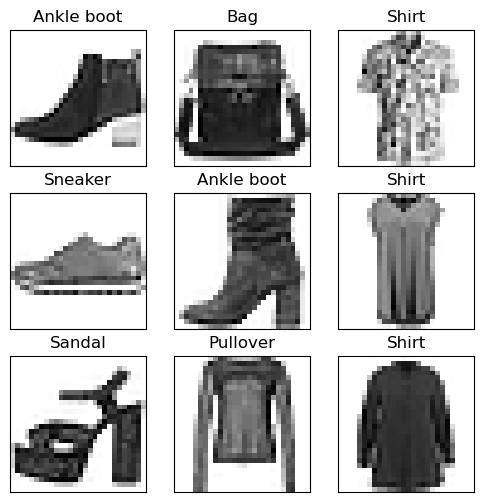

In [76]:
import matplotlib.pyplot as plt
import numpy as np
# Verify the data looks as expected

# Selecting 9 random indices
random_indices = np.random.choice(len(X_train), 9, replace=False)

# Creating a 3x3 grid plot
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[random_indices[i]], cmap=plt.cm.gray_r, interpolation='nearest')
    label_index = y_train[random_indices[i]].nonzero()[0][0]
    label = class_names[label_index]
    ax.set_title(label)

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

The data looks good for a 28x28 pixels grayscale dataset with limited quality.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [156]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input


# Create a simple linear regression model
model = Sequential()
# You can use `model.add(<layer>)` to add layers to the model
#Input layers
model.add(Input(shape=(28,28)))
model.add(Flatten())
#Output layer
model.add(Dense(10))

model.summary()

# Compile the model using `model.compile()`
model.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'] 
)
# Train the model with `model.fit()`
model.fit(
        x=X_train,
        y=y_train,
        batch_size=32,
        epochs=15,
        validation_split=0.2
)
# Evaluate the model with `model.evaluate()`
loss, accuracy = model.evaluate(X_test,y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_37 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1916 - loss: 9.6652 - val_accuracy: 0.1972 - val_loss: 9.9219
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1602 - loss: 9.9253 - val_accuracy: 0.1082 - val_loss: 9.8845
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1115 - loss: 10.2692 - val_accuracy: 0.1069 - val_loss: 10.6796
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1064 - loss: 9.9873 - val_accuracy: 0.1184 - val_loss: 9.5152
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1344 - loss: 10.0380 - val_accuracy: 0.1338 - val_loss: 9.3901
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1259 - loss: 9.5045 - val_accuracy: 0.0993 - val_loss: 10.2484
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1022 - loss: 10.2580 - val_accuracy: 0.1203 - val_loss: 10.4002
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1165 - loss: 9.4

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**Your answer here**
The performance is really poor withn accuracy of 19.86% evaluating on the test set. Is better than I thought given that we don't have an activation function. The performance is good for a baseline but not ready for production.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [83]:
from keras.layers import Conv2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model_cnn
model_cnn = Sequential()
model_cnn.add(Input(shape=(28,28,1)))
model_cnn.add(Conv2D(32,(3,3),activation = 'relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(10, activation='softmax'))

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'] 
)

model_cnn.summary()
# Train the model_cnn with `model.fit()`
model_cnn.fit(
        x=X_train,
        y=y_train,
        batch_size=32,
        epochs=15,
        validation_split=0.2
)
# Evaluate the model_cnn with `model.evaluate()`
loss, accuracy = model_cnn.evaluate(X_test,y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │       216,330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 216,650 (846.29 KB)

 Trainable params: 216,650 (846.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8118 - loss: 0.5336 - val_accuracy: 0.8843 - val_loss: 0.3285
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8976 - loss: 0.2880 - val_accuracy: 0.8867 - val_loss: 0.3163
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9112 - loss: 0.2502 - val_accuracy: 0.8942 - val_loss: 0.3002
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9216 - loss: 0.2224 - val_accuracy: 0.8947 - val_loss: 0.3024
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9273 - loss: 0.2003 - val_accuracy: 0.8971 - val_loss: 0.3028
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9351 - loss: 0.1827 - val_accuracy: 0.9002 - val_loss: 0.2912
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9439 - loss: 0.1645 - val_accuracy: 0.8855 - val_loss: 0.3486
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9471 - loss: 0.1497 - 

Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**Your answer here**
The accuracy is way better(89.81% accuracy compared to 19.86% accuracy. Improvement of 73.67% accuracy compared to baseline)
I think the improvement is because the convolution layer is amazing detecting image objects with its multiple filters, however increases the number of parameters in a great deal.

# 4. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [115]:
# A. Test Hyperparameters
# Changing to different values of filters
from keras.layers import Conv2D

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
batch_sizes = [32,64,128]
results = []
for filter in batch_sizes:
    model_2 = Sequential()
    model_2.add(Input(shape=(28,28,1)))
    model_2.add(Conv2D(64,(3,3),activation = 'relu'))
    model_2.add(Flatten())
    model_2.add(Dense(10, activation='softmax'))
    
    model_2.compile(
        loss='categorical_crossentropy',
        optimizer="adam",
        metrics=['accuracy'] 
    )
    
    model_2.fit(
            x=X_train,
            y=y_train,
            batch_size=filter,
            epochs=15,
            validation_split=0.2
    )
    loss, accuracy = model_2.evaluate(X_test,y_test)
    results.append(accuracy)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8165 - loss: 0.5224 - val_accuracy: 0.8899 - val_loss: 0.3161
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8993 - loss: 0.2812 - val_accuracy: 0.8986 - val_loss: 0.2969
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9166 - loss: 0.2339 - val_accuracy: 0.8976 - val_loss: 0.2879
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9268 - loss: 0.2005 - val_accuracy: 0.8975 - val_loss: 0.2983
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9374 - loss: 0.1749 - val_accuracy: 0.9032 - val_loss: 0.2908
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9472 - loss: 0.1503 - val_accuracy: 0.8980 - val_loss: 0.3169
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9526 - loss: 0.1349 - val_accuracy: 0.9017 - val_loss: 0.3115
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9603 - loss: 0

In [116]:
# B. Test presence or absence of regularization
from keras.layers import Conv2D, Dropout

import matplotlib.pyplot as plt

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
batch_sizes = [32,64,128]

for filter in batch_sizes:
    model_2_drop = Sequential()
    model_2_drop.add(Input(shape=(28,28,1)))
    model_2_drop.add(Conv2D(64,(3,3),activation = 'relu'))
    model_2_drop.add(Flatten())
    model_2_drop.add(Dropout(0.33))
    model_2_drop.add(Dense(10, activation='softmax'))
    
    model_2_drop.compile(
        loss='categorical_crossentropy',
        optimizer="adam",
        metrics=['accuracy'] 
    )
    
    model_2_drop.fit(
            x=X_train,
            y=y_train,
            batch_size=filter,
            epochs=15,
            validation_split=0.2
    )
    loss, accuracy = model_2_drop.evaluate(X_test,y_test)
    results.append(accuracy)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8081 - loss: 0.5399 - val_accuracy: 0.8832 - val_loss: 0.3313
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8916 - loss: 0.2990 - val_accuracy: 0.8930 - val_loss: 0.3068
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9106 - loss: 0.2527 - val_accuracy: 0.8931 - val_loss: 0.3058
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9190 - loss: 0.2277 - val_accuracy: 0.8985 - val_loss: 0.2973
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9245 - loss: 0.2058 - val_accuracy: 0.8985 - val_loss: 0.2931
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9339 - loss: 0.1849 - val_accuracy: 0.9045 - val_loss: 0.2908
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9370 - loss: 0.1715 - val_accuracy: 0.9038 - val_loss: 0.2970
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9441 -

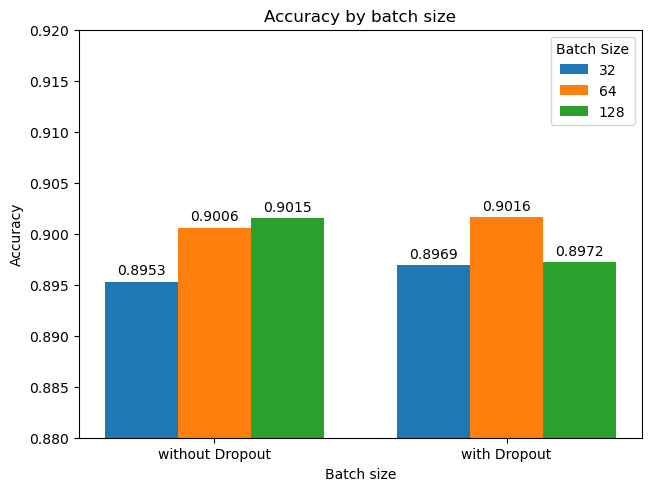

In [163]:
# B. Test presence or absence of regularization

r = {
    '32': (results[0],results[3]),
    '64': (results[1],results[4]),
    '128':(results[2],results[5]),
}
width = 0.25
multiplier = 0
x = np.arange(2)

fig, ax = plt.subplots(layout = 'constrained')
for b_size, acc in r.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, acc, width, label=b_size)
    ax.bar_label(rects, padding=3)
    multiplier += 1


ax.set_ylim(0.88,0.92)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Batch size')
ax.set_xticks(x+width,('without Dropout','with Dropout'))
ax.set_title('Accuracy by batch size')
ax.legend(title='Batch Size')

Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Your answer here**
Increasing the number of filters in the CNN improves sligtly the performance for 64 and 128 layers. However, it seems to lead to overfitting with 128 layers. In both cases, adding dropout to the model improves the model and should be considered in the solution. The combination that yielded the best result is BatchSize 64 with dropout.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [119]:

from keras.layers import Conv2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model_final
model_final = Sequential()
model_final.add(Input(shape=(28,28,1)))
model_final.add(Conv2D(64,(3,3),activation = 'relu'))
model_final.add(Flatten())
model_final.add(Dropout(0.33))
model_final.add(Dense(10, activation='softmax'))

model_final.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'] 
)

# Train the model_final with `model.fit()`
model_final.fit(
        x=X_train,
        y=y_train,
        batch_size=32,
        epochs=15,
        validation_split=0.2
)
# Evaluate the model_final with `model.evaluate()`
loss, accuracy = model_final.evaluate(X_test,y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8072 - loss: 0.5469 - val_accuracy: 0.8867 - val_loss: 0.3237
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8938 - loss: 0.2970 - val_accuracy: 0.8962 - val_loss: 0.2926
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9074 - loss: 0.2551 - val_accuracy: 0.8956 - val_loss: 0.2924
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9194 - loss: 0.2257 - val_accuracy: 0.9010 - val_loss: 0.2919
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9255 - loss: 0.2044 - val_accuracy: 0.8966 - val_loss: 0.2968
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9328 - loss: 0.1863 - val_accuracy: 0.9028 - val_loss: 0.2846
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9383 - loss: 0.1702 - val_accuracy: 0.9023 - val_loss: 0.2922
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9417 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2000 - loss: 9.8751
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9006 - loss: 0.3960
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9027 - loss: 0.3660


Text(0.5, 1.0, 'Accuracy by batch size')

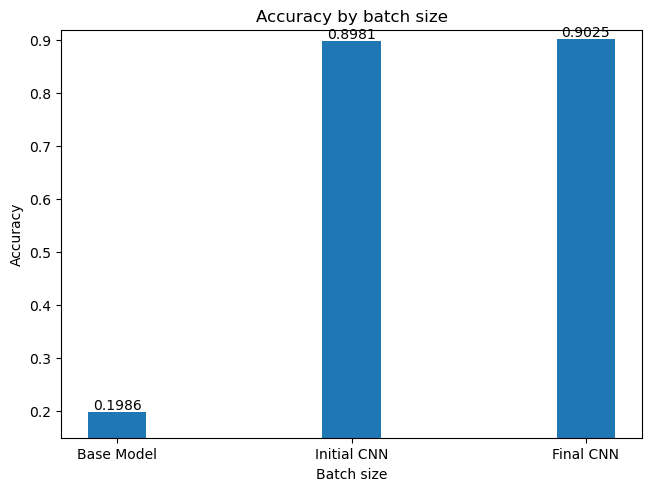

In [165]:

r = {
    'accuracy': (model.evaluate(X_test,y_test)[1],model_cnn.evaluate(X_test,y_test)[1], model_final.evaluate(X_test,y_test)[1]),
}
width = 0.25
multiplier = 0
x = np.arange(3)

fig, ax = plt.subplots(layout = 'constrained')
for b_size, acc in r.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, acc, width, label=b_size)
    ax.bar_label(rects)
    multiplier += 1


ax.set_ylim(0.15,0.92)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Batch size')
ax.set_xticks(x,('Base Model','Initial CNN','Final CNN'))
ax.set_title('Accuracy by batch size')

Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Your answer here**


🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 26/10/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
    * The Lab 3 notebook (labs/lab_3.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help-ml`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.